# Import data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

In [4]:
from DLtools.Data_preprocess import  load_data

In [6]:
r = 'data/instant_data/rain_small.csv'
w = 'data/instant_data/water_small.csv'

rw = load_data(r,w,start='2013-01-01',stop='2017-12-31')
df_water = rw.water_df
df_rain = rw.rain_df
df = rw.df.resample('d').mean()

DataFrame shape: (306745, 35)


In [7]:
df.head()

,CHM002_r,CHM004_r,CHM006_r,CPY004_r,CPY009_r,CPY010_r,CPY015_r,KWN002_r,NAN006_r,NAN010_r,...,CPY015_w,KWN002_w,NAN009_w,NAN010_w,NAN011_w,NAN012_w,NAN013_w,PIN001_w,PIN004_w,THA001_w
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.797222,NaN,NaN,NaN,NaN,NaN,NaN,119.359161,40.765833,15.046528
2013-01-02,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.636250,NaN,NaN,NaN,NaN,NaN,NaN,119.383333,40.826023,15.028889
2013-01-03,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.581458,NaN,NaN,NaN,NaN,NaN,NaN,119.499650,40.822639,14.972569
2013-01-04,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,...,0.532153,NaN,NaN,NaN,NaN,NaN,NaN,119.406434,40.872361,14.956528
2013-01-05,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.2,NaN,...,0.530139,NaN,NaN,NaN,NaN,NaN,NaN,119.403287,40.996559,14.932222


In [8]:
#df = df.interpolate(method='pad', limit=30) # selected period, interporlation missing value
#df.dropna(axis=1,inplace=True) # drop na stations 
print(df.shape)
df.interpolate(method='pad', limit=30,inplace=True)
df = df.fillna(0)
df.head()


(1826, 35)


,CHM002_r,CHM004_r,CHM006_r,CPY004_r,CPY009_r,CPY010_r,CPY015_r,KWN002_r,NAN006_r,NAN010_r,...,CPY015_w,KWN002_w,NAN009_w,NAN010_w,NAN011_w,NAN012_w,NAN013_w,PIN001_w,PIN004_w,THA001_w
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.797222,0.0,0.0,0.0,0.0,0.0,0.0,119.359161,40.765833,15.046528
2013-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.636250,0.0,0.0,0.0,0.0,0.0,0.0,119.383333,40.826023,15.028889
2013-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.581458,0.0,0.0,0.0,0.0,0.0,0.0,119.499650,40.822639,14.972569
2013-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.532153,0.0,0.0,0.0,0.0,0.0,0.0,119.406434,40.872361,14.956528
2013-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.530139,0.0,0.0,0.0,0.0,0.0,0.0,119.403287,40.996559,14.932222


# LSTM

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler

In [10]:
# print("********RAIN_BEFORE********")
# print("Min: ", np.min(df))
# print("Max: ", np.max(df))
#print("********RAIN_AFTER********")
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
#y = scaler.fit_transform(y)
print("Min: ", np.min(df))
print("Max: ", np.max(df))

Min:  CHM002_r    0.0
CHM004_r    0.0
CHM006_r    0.0
CPY004_r    0.0
CPY009_r    0.0
CPY010_r    0.0
CPY015_r    0.0
KWN002_r    0.0
NAN006_r    0.0
NAN010_r    0.0
NAN011_r    0.0
NAN012_r    0.0
NAN013_r    0.0
PIN001_r    0.0
PIN003_r    0.0
PIN004_r    0.0
PIN005_r    0.0
THA001_r    0.0
CHM002_w    0.0
CHM004_w    0.0
CHM006_w    0.0
CPY003_w    0.0
CPY004_w    0.0
CPY009_w    0.0
CPY010_w    0.0
CPY015_w    0.0
KWN002_w    0.0
NAN009_w    0.0
NAN010_w    0.0
NAN011_w    0.0
NAN012_w    0.0
NAN013_w    0.0
PIN001_w    0.0
PIN004_w    0.0
THA001_w    0.0
dtype: float64
Max:  CHM002_r    1.0
CHM004_r    1.0
CHM006_r    1.0
CPY004_r    1.0
CPY009_r    1.0
CPY010_r    1.0
CPY015_r    1.0
KWN002_r    1.0
NAN006_r    1.0
NAN010_r    1.0
NAN011_r    1.0
NAN012_r    1.0
NAN013_r    1.0
PIN001_r    1.0
PIN003_r    1.0
PIN004_r    1.0
PIN005_r    1.0
THA001_r    1.0
CHM002_w    1.0
CHM004_w    1.0
CHM006_w    1.0
CPY003_w    1.0
CPY004_w    1.0
CPY009_w    1.0
CPY010_w    1.0
CPY015_w    1

In [11]:
timelag = 7
y = df['CPY015_w'].shift(-timelag)

In [12]:
X = df.values[:-timelag]
print(type(X))
print("Shape:",X.shape)
print("*"*20)

y = y.values[:-timelag]
y = y.reshape(-1,1)
print(type(y))
print("Shape:", y.shape)

<class 'numpy.ndarray'>
Shape: (1819, 35)
********************
<class 'numpy.ndarray'>
Shape: (1819, 1)


In [13]:
num_data = len(X)
train_split = 0.8 #8:2 train:test

num_train = int(train_split*num_data)
num_test = num_data-num_train

print("Total data From..",num_data)
print("Train:",num_train,", Test:",num_test)

######################################
x_train = X[0:num_train]
x_test = X[num_train:]

y_train = y[0:num_train]
y_test = y[num_train:]

num_x_feature = X.shape[1]
num_y_feature = y.shape[1]
######################################
print('='*30)
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x feature....",num_x_feature)
print("y feature....",num_y_feature)

Total data From.. 1819
Train: 1455 , Test: 364
x_train shape (1455, 35)
y_train shape (1455, 1)
x feature.... 35
y feature.... 1


In [14]:
def batch_gen(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_feature)
        x_batch = np.zeros(shape = x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_feature)
        y_batch = np.zeros(shape = y_shape, dtype=np.float16)
        
        #fill batch with random sequences of data
        for i in range(batch_size):
            
            #Get rand start index,
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequence of data start at this index.
            x_batch[i] = x_train[idx:idx+sequence_length]
            y_batch[i] = y_train[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)       

In [15]:
batch_size = 256
sequence_length = timelag

generator = batch_gen(batch_size=batch_size,
                            sequence_length=sequence_length)

x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

(256, 7, 35)
(256, 7, 1)


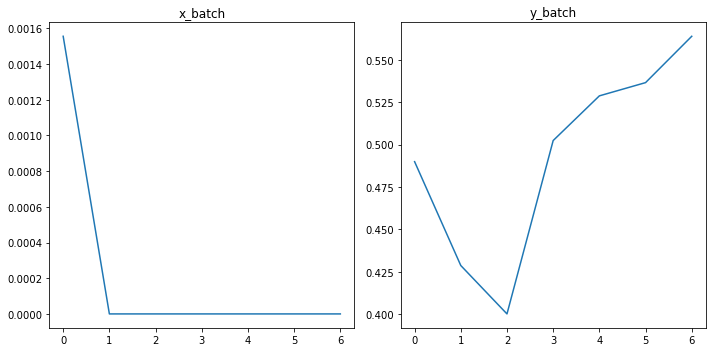

In [16]:
batch = 10  # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
seq2 = y_batch[batch, :, signal]


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(seq)
ax[0].set_title("x_batch")
ax[1].plot(seq2)
ax[1].set_title("y_batch")
fig.tight_layout() 


In [17]:
validation_data = (np.expand_dims(x_test, axis=0),np.expand_dims(y_test, axis=0))

print("x_test shape:",validation_data[0].shape)
print("y_test shape:",validation_data[1].shape)

x_test shape: (1, 364, 35)
y_test shape: (1, 364, 1)


In [47]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(None,num_x_feature),
              activation='relu'))
model.add(LSTM(128,return_sequences=True))
model.add(Dense(num_y_feature,activation='relu'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, None, 128)         83968     
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           129       
Total params: 215,681
Trainable params: 215,681
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(x=generator,
          epochs=100,
          steps_per_epoch=10,validation_data=validation_data)

Epoch 1/100
10/10 [==============================] - 1s 125ms/step - loss: 0.1341 - accuracy: 5.5804e-04 - val_loss: 0.5325 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 43ms/step - loss: 0.0610 - accuracy: 5.0223e-04 - val_loss: 0.0246 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 44ms/step - loss: 0.0439 - accuracy: 8.9286e-04 - val_loss: 0.0133 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 46ms/step - loss: 0.0305 - accuracy: 8.9286e-04 - val_loss: 0.0439 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 45ms/step - loss: 0.0211 - accuracy: 3.9063e-04 - val_loss: 0.1379 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 46ms/step - loss: 0.0171 - accuracy: 8.3705e-04 - val_loss: 0.0752 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 45ms/step - loss: 0.0140 - accuracy: 8.3705

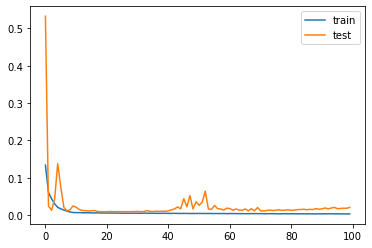

In [49]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [29]:
# make a forecast
def forecast(model, history, n_input):
    # flatten data
    data = np.array(history)
    try :data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    except: pass
    # retrieve last observations for input data
    input_x = data[-n_input:, :]
    # reshape into [1, n_input, 1]
    input_x = input_x.reshape((1, input_x.shape[0], input_x.shape[1]))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

In [31]:
history = [x for x in x_train]
predictions = list()

for t in range(len(x_test)):
    yhat = forecast(model, history, n_input=timelag)
    predictions.append(yhat)
    history.append(x_test)    
    #print('predicted=%f, expected=%f' % (yhat, obs))

mse,nse = real_eva_error(predictions,test)
r2 = r2_score(test,predictions)

print('Test MSE: %.3f Test NSE: %.3f' % (mse,nse))
print("R2 score: {}".format(r2))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [24]:
x_test

array([[0.00155521, 0.00239234, 0.        , ..., 0.98996206, 0.24240036,
        0.49793671],
       [0.        , 0.        , 0.        , ..., 0.98864306, 0.24150705,
        0.47158119],
       [0.        , 0.00239234, 0.        , ..., 0.98923057, 0.24028294,
        0.43336353],
       ...,
       [0.00155521, 0.        , 0.00327869, ..., 0.99270473, 0.34308084,
        0.44869085],
       [0.00155521, 0.        , 0.00327869, ..., 0.99230804, 0.34786264,
        0.46020791],
       [0.00155521, 0.        , 0.        , ..., 0.99216695, 0.34254223,
        0.4683173 ]])